<a href="https://colab.research.google.com/github/dokeyuka/deep-learning-practice/blob/main/deep_learning_practice1_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install torch 


     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
import torch
import torchvision

# 1 simple perceptron
## 2値分類・step関数
## (1) model definition

In [ ]:
class SimplePerceptron(object):

  #入力次元n、パラメータ：重みwとバイアスbの初期化
  def __init__(self, input_dim):
    self.input_dim = input_dim
    self.w = np.random.normal(size= (input_dim, ))
    self.b = 0.
  
  #受け取つた電気信号を次に伝搬
  def forward(self, x):
    y = step(np.matmul(self.w, x) + self.b)
    return y
  def compute_deltas(self, x, t):
    y = self.forward(x)
    delta = y - t
    dw = delta * x
    db = delta
    return dw, db

def step(x):
    return 1*(x > 0)

## (2) preparetion of data

In [ ]:
import numpy as np

#input dimention
d = 2
#number of data
N = 20

mean = 5

#平均0正規分布に従う10個のデータ
x1 = np.random.randn(N//2, d) + np.array([0, 0])
#平均5正規分布に従う10個のデータ
x2 = np.random.randn(N//2, d) + np.array([mean, mean])

#入力データ
x = np.concatenate((x1, x2), axis = 0)

#出力データ(0,1の配列)
t1 = np.zeros(N//2)
t2 = np.ones(N//2)
t = np.concatenate((t1, t2))



## (3) モデルの構築

In [ ]:
model = SimplePerceptron(input_dim = d)

## (4) モデルの学習

In [ ]:
def compute_loss(dw, db):
  #学習の終了判定のために誤差があるかどうかを返す
  return all(dw == 0)*(db == 0)

def train_step(x, t):
  #データを用いてパラメータを更新
  dw, db = model.compute_deltas(x, t)
  loss = compute_loss(dw, db)
  model.w = model.w - dw
  model.b = model.b - db
  return loss

while True:
  classified = True
  for i in range(N):
    loss = train_step(x[i], t[i])
    classified *= loss
  if classified:
    break



## (5) モデルの評価

In [ ]:
print('w:', model.w)
print('b:', model.b)


w: [1.13799956 2.52508906]
b: -6.0


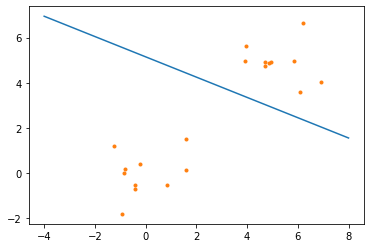

In [ ]:
from matplotlib import pyplot as plt
s = np.linspace(-4, 8, 100)

y = -(model.w[0] *s - 13)/model.w[1]

plt.plot(s, y)
plt.plot(x[:,0], x[:,1], '.')

In [ ]:

print('(0,0) =>', model.forward([0, 0]))
print('(5,5) =>', model.forward([5, 5]))


(0,0) => 0
(5,5) => 1


# 2 Logistic Regression
## 2値分類・sigmoid関数(出力：確率)

# 3 Multi Logistic Regression
## 多クラス分類・softmax関数


## (1)モデルの実装

In [ ]:
import numpy as np
from sklearn.utils import shuffle

class LogisticRegression(object):
  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.w = np.random.normal(size = (input_dim, output_dim))
    self.b = np.zeros(output_dim)

  def __call__(self, x):
    return self.forward(x)
  
  def forward(self, x):
    return softmax(np.matmul(x, self.w) + self.b)

  def compute_gradients(self, x, t):
    y = self.forward(x)
    delta = y - t
    dw = np.matmul(x.T, delta)
    db = np.matmul(np.ones(x.shape[0]), delta)
    return dw, db

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims = True)

  


## (2) data準備 

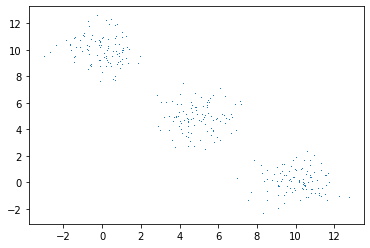

In [ ]:
from matplotlib import pyplot as plt

#入力データの次元
M = 2 
#出力データの次元
K = 3
#クラスごとのデータ数
n = 100
#全データ数
N = n * K

#100×２
x1 = np.random.randn(n, M) + np.array([0,10])
#print(x1)
x2 = np.random.randn(n, M) + np.array([5,5])
x3 = np.random.randn(n, M) + np.array([10,0])

t1 = np.array([[1,0,0] for i in range(n)])
t2 = np.array([[0,1,0] for i in range(n)])
t3 = np.array([[0,0,1] for i in range(n)])

x = np.concatenate((x1,x2,x3),axis = 0)
t = np.concatenate((t1,t2,t3), axis = 0)



#visualization
plt.plot(x[:,0], x[:,1], ',')


## (3)モデルの構築

In [ ]:
model = LogisticRegression(input_dim = M, output_dim = K)


## (4) モデルの学習
### ミニバッチ学習
データをシャッフル→ミニバッチに分割→勾配降下法

In [ ]:
def compute_loss(t, y):
  return (-t*np.log(y)).sum(axis = 1).mean()

def train_step(x,t):
  dw, db = model.compute_gradients(x,t)
  model.w = model.w - 0.1*dw
  model.b = model.b - 0.1*db
  loss = compute_loss(t, model(x))
  return loss

epochs = 10
batch_size = 50
#行数(x.shape[0] == 300)
n_batches = x.shape[0] // batch_size
print(n_batches)

for epoch in range(epochs):
  train_loss = 0.
  #全データをシャッフル
  x_, t_ = shuffle(x,t)

  for n_batch in range(n_batches):
    start = n_batch * batch_size
    end = start + batch_size 

    train_loss += train_step(x_[start:end], t_[start: end])

    if epoch % 10 == 0 or epoch == epochs -1:
      print('epoch: {}, loss: {:.3f}'.format(epoch+1, train_loss))


6
epoch: 1, loss: 38.143
epoch: 1, loss: 49.806
epoch: 1, loss: 69.113
epoch: 1, loss: 69.562
epoch: 1, loss: 69.562
epoch: 1, loss: 69.562
epoch: 10, loss: 0.000
epoch: 10, loss: 0.000
epoch: 10, loss: 0.000
epoch: 10, loss: 0.000
epoch: 10, loss: 0.000
epoch: 10, loss: 0.000


## (5)モデルの評価 

In [ ]:
x_, t_ = shuffle(x,t)
preds = model(x_[0:5])
classified =  np.argmax(t_[0:5], axis = 1) == np.argmax(preds[0:5], axis = 1)

print('Prediction matched:', classified)

Prediction matched: [ True  True  True  True  True]


In [ ]:
print(model.w)
print(model.b)


[[-16.89735903   6.03371763  13.7710845 ]
 [ 15.7970369    8.05488895 -22.47255384]]
[-0.30130294  1.44559082 -1.14428788]


# 3 Muti Layer Perceptron
## 線形分離不可能 : XORゲート, 誤差のbackpropagation
## (1) Layer クラスの実装
### 1 __init__ :パラメータ初期化、活性化関数設定
### 2 forward:データの順伝搬
### 3 backward:誤差の逆伝搬
### 4 compute_gradients:モデル学習時の各勾配



In [ ]:
class Layer(obect):
  def __init__(self, input_dim, output_dim, activation, dactivation):
    #instance variables:weight. bias, 活性化関数、活性化関数の微分
    self.w = np.random.normal(size = ()